In [1]:
from pathlib import Path
import os
os.chdir('/Users/federicoferoggio/Documents/vs_code/latent-communication')

import itertools

import torch
import numpy as np
from tqdm import tqdm
from torchvision.datasets import MNIST
from torchvision.transforms import transforms
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from models.definitions.PocketAutoencoder import PocketAutoencoder
from utils.dataloaders.dataloader_mnist_single import DataLoaderMNIST
from utils.visualization import visualize_mapping_error, visualize_latent_space_pca, plot_latent_space, highlight_cluster

DEVICE = torch.device('cuda') if torch.cuda.is_available() else 'cpu'
augmentations = [transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))]

class Config:
    def __init__(self, **entries):
        self.__dict__.update(entries)


In [2]:
def create_mapping(cfg, latents1, latents2):
    if cfg.mapping == 'Linear':
        from optimization.optimizer import LinearFitting
        mapping = LinearFitting(latents1, latents2, lamda=cfg.lamda)
    elif cfg.mapping == 'Affine':
        from optimization.optimizer import AffineFitting
        mapping = AffineFitting(latents1, latents2, lamda=cfg.lamda)
    elif cfg.mapping == 'NeuralNetwork':
        from optimization.optimizer import NeuralNetworkFitting
        mapping = NeuralNetworkFitting(latents1, latents2, hidden_dim=cfg.hidden_size, lamda=cfg.lamda, learning_rate=cfg.learning_rate, epochs=cfg.epochs)
    else:
        raise ValueError("Invalid experiment name")
    return mapping
def visualize_modified_latent_space_pca(latents_trans, latents_2, labels, fig_path=None, anchors=None, pca=None, size=10, bg_alpha=1, alpha=1, title='2D PCA of Latent Space'):
    """
    Visualizes the 2D latent space obtained from PCA.

    Args:
        latents_trans: A tensor of shape (N, dim) representing the first set of latent points.
        latents_2: A tensor of shape (N, dim) representing the second set of latent points.
        labels: A tensor of shape (N,) representing the labels for each latent point.
        fig_path: Optional; Path to save the figure.
        anchors: Optional; A tensor of shape (M, dim) representing anchor points in the latent space.
        pca: Optional; A PCA object to use for transforming the latent space.
        size: Optional; Size of the points in the plot.
        bg_alpha: Optional; Alpha value for the background points.
        alpha: Optional; Alpha value for the highlighted points.
    """
    # Convert lists to tensors if needed
    if isinstance(latents_trans, list):
        latents_trans = torch.tensor(latents_trans)
    if isinstance(latents_2, list):
        latents_2 = torch.tensor(latents_2)
    labels = np.asarray(labels)

        # Concatenate latent spaces
    latents = torch.cat([latents_trans, latents_2], dim=0)
    print(latents.shape)


    if pca is None:
        pca = PCA(n_components=2)
        latents_2d = pca.fit_transform(latents)
    else:
        latents_2d = pca.transform(latents)

    # Normalize latents
    minimum = latents_2d.min(axis=0)
    maximum = latents_2d.max(axis=0)
    latents_2d -= minimum
    latents_2d /= maximum

    # Separate the two datasets
    latents_trans_2d = latents_2d[:len(latents_trans)]
    latents_2_2d = latents_2d[len(latents_trans):]

    # Create DataFrames for easy plotting
    latent_df_trans = pd.DataFrame(latents_trans_2d, columns=['x', 'y'])
    latent_df_trans['target'] = labels

    latent_df_2 = pd.DataFrame(latents_2_2d, columns=['x', 'y'])
    latent_df_2['target'] = labels

    # Plot the 2D latent space
    fig, ax = plt.subplots(figsize=(6, 6))
    cmap = plt.get_cmap('tab10')
    norm = plt.Normalize(latent_df_trans['target'].min(), latent_df_trans['target'].max())

    ax =   plot_latent_space(ax,latent_df_trans,targets=np.unique(labels),size=size,cmap=cmap, norm=norm,bg_alpha=bg_alpha,alpha=alpha,  marker='2')
    ax =   plot_latent_space(ax,latent_df_2,targets=np.unique(labels),size=size,cmap=cmap, norm=norm,bg_alpha=bg_alpha,alpha=alpha , marker='1')

    if anchors is not None:
        # plot anchors with star marker
        anchors_2d = pca.transform(anchors.cpu().detach().numpy())
        anchors_2d -= minimum
        anchors_2d /= maximum
        ax.scatter(anchors_2d[:, 0], anchors_2d[:, 1], marker='*', s=50, c='black')

    plt.title(title)
    if fig_path is not None:
        plt.savefig(fig_path)
    plt.show()

/var/folders/tp/9l7ncvh137x08kdlp_fvr1nw0000gn/T/ipykernel_41545/953721331.py:31: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:277.)
  latent1_pl = torch.tensor(latent1_pl)


Defining the problem
Solving the problem
Results saved at  results/transformations/SMALLAE/Linear_MNIST_SMLLAE_0.01_128_5_3_MNIST_SMLLAE_0.01_128_1_4_49/Linear_MNIST_SMLLAE_0.01_128_5_3_MNIST_SMLLAE_0.01_128_1_4_49/mapping.pth


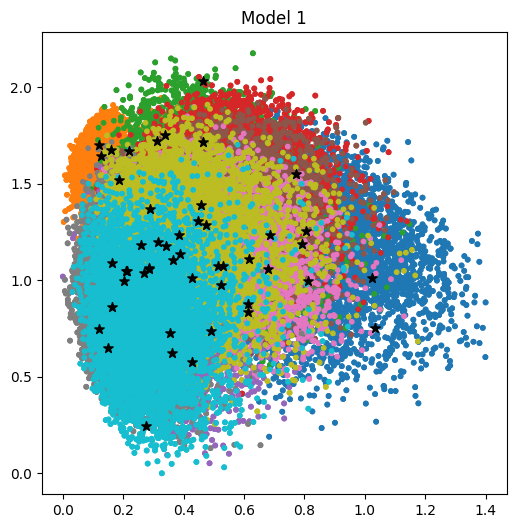

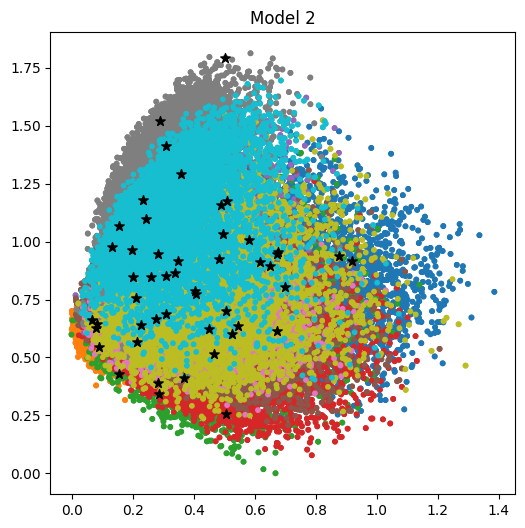

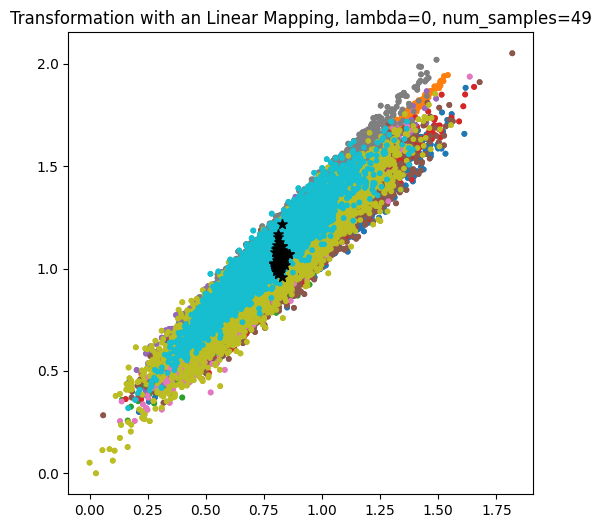

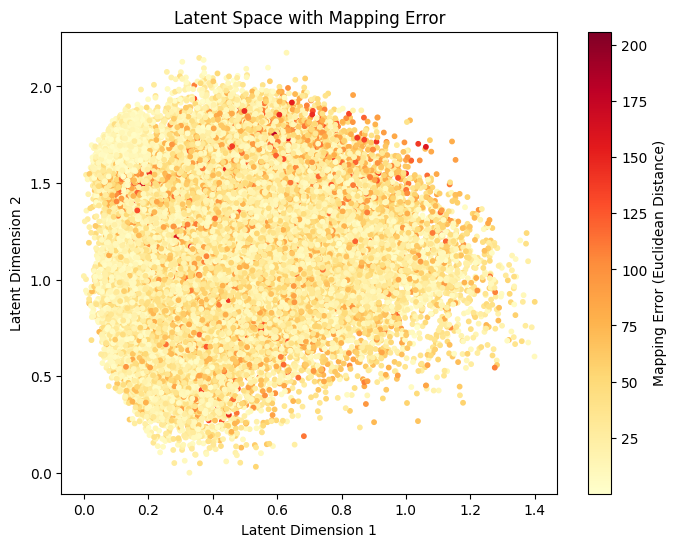

Defining the problem
Solving the problem
Results saved at  results/transformations/SMALLAE/Linear_MNIST_SMLLAE_0.01_128_5_3_MNIST_SMLLAE_0.01_128_1_4_49/Linear_MNIST_SMLLAE_0.01_128_5_3_MNIST_SMLLAE_0.01_128_1_4_49/mapping.pth


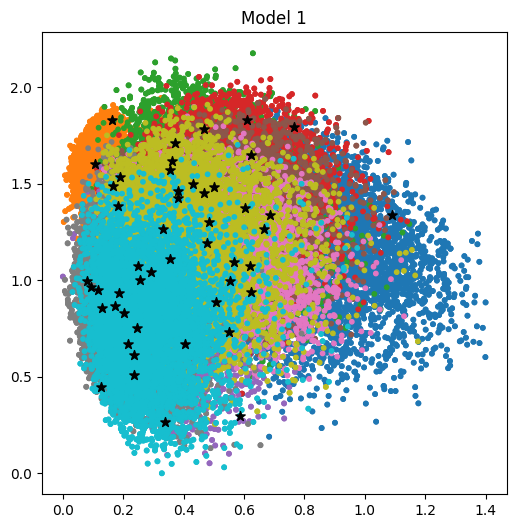

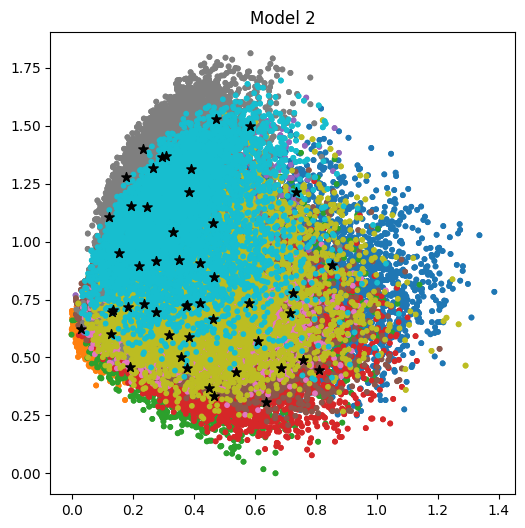

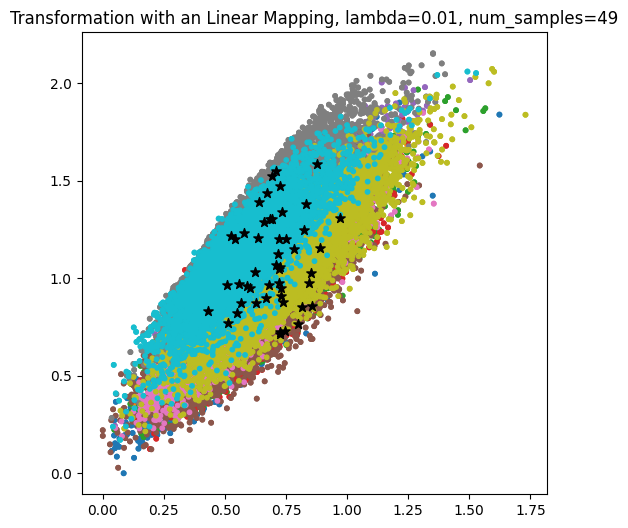

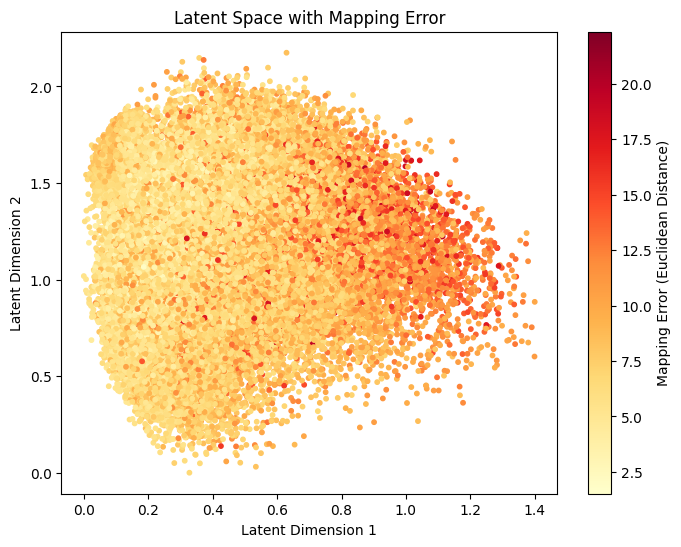

Defining the problem
Solving the problem
Results saved at  results/transformations/SMALLAE/Linear_MNIST_SMLLAE_0.01_128_5_3_MNIST_SMLLAE_0.01_128_1_4_49/Linear_MNIST_SMLLAE_0.01_128_5_3_MNIST_SMLLAE_0.01_128_1_4_49/mapping.pth


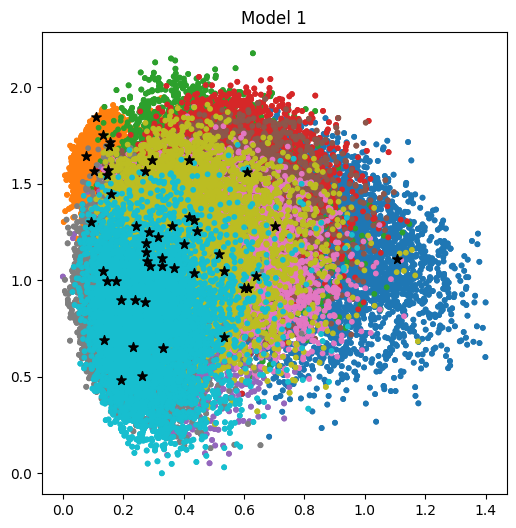

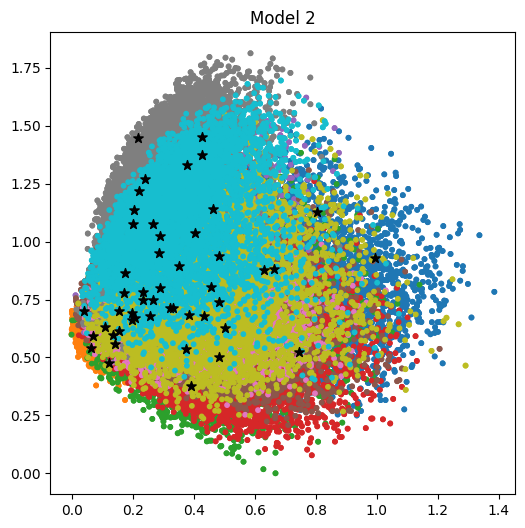

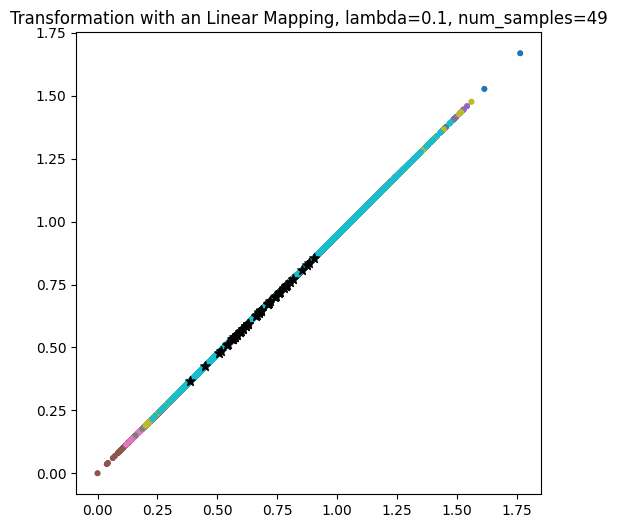

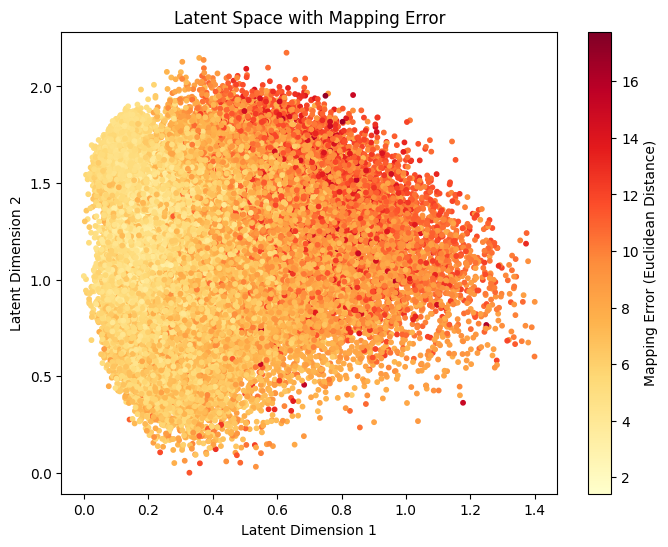

Defining the problem
Solving the problem
Results saved at  results/transformations/SMALLAE/Affine_MNIST_SMLLAE_0.01_128_5_3_MNIST_SMLLAE_0.01_128_1_4_49/Affine_MNIST_SMLLAE_0.01_128_5_3_MNIST_SMLLAE_0.01_128_1_4_49/mapping.pth


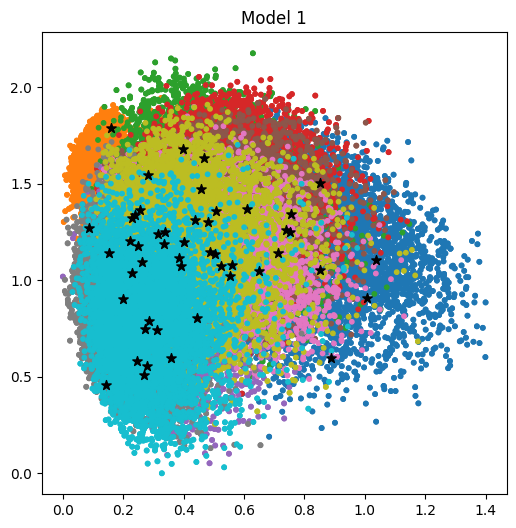

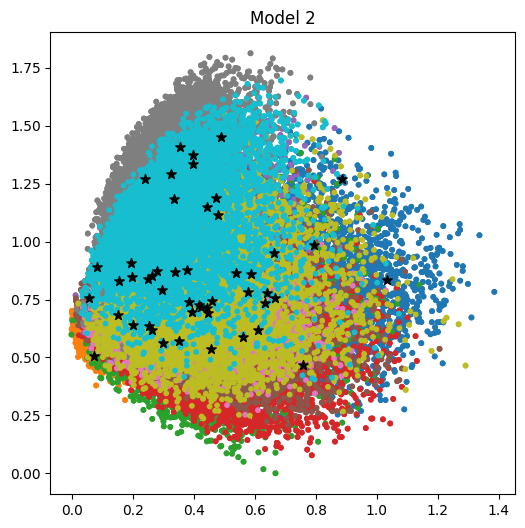

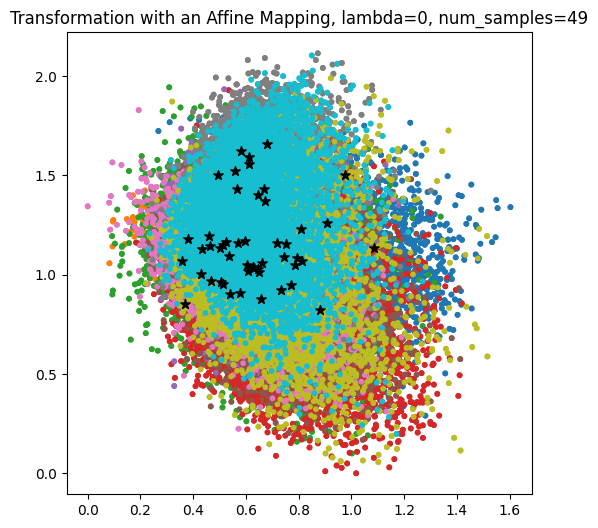

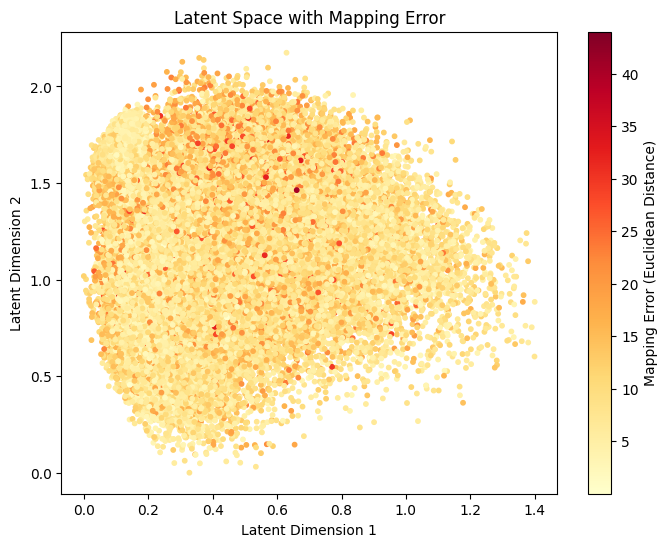

Defining the problem
Solving the problem
Results saved at  results/transformations/SMALLAE/Affine_MNIST_SMLLAE_0.01_128_5_3_MNIST_SMLLAE_0.01_128_1_4_49/Affine_MNIST_SMLLAE_0.01_128_5_3_MNIST_SMLLAE_0.01_128_1_4_49/mapping.pth


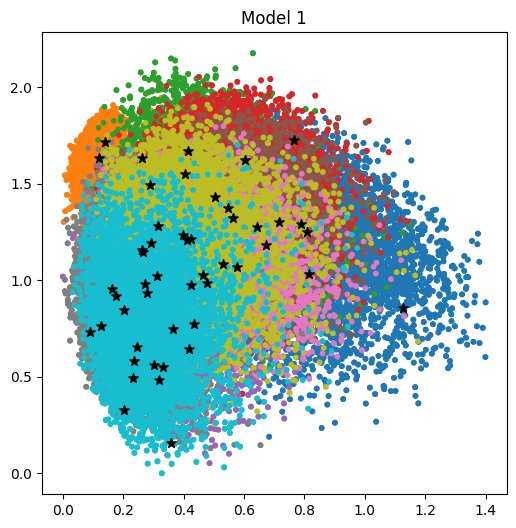

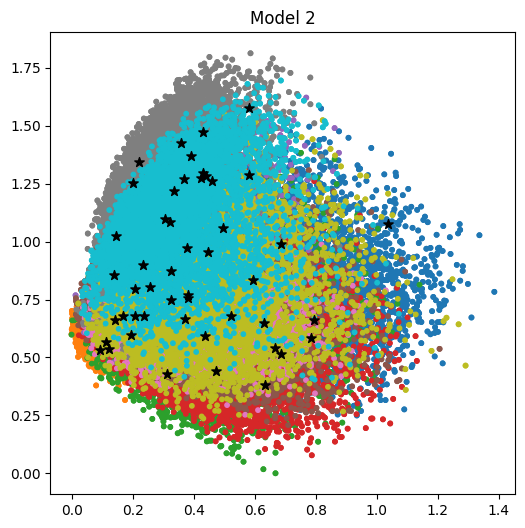

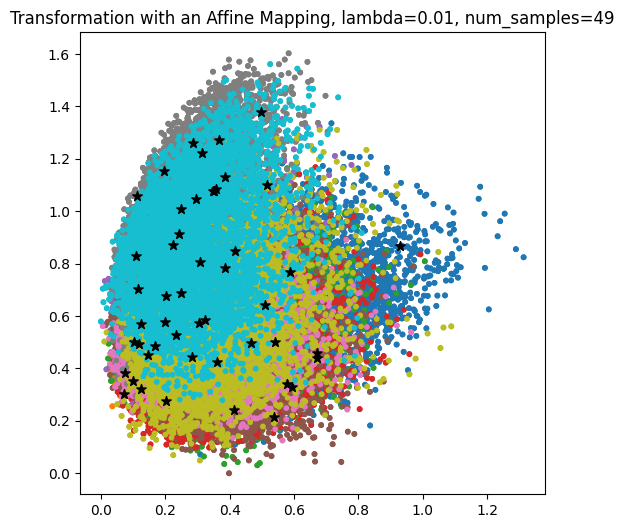

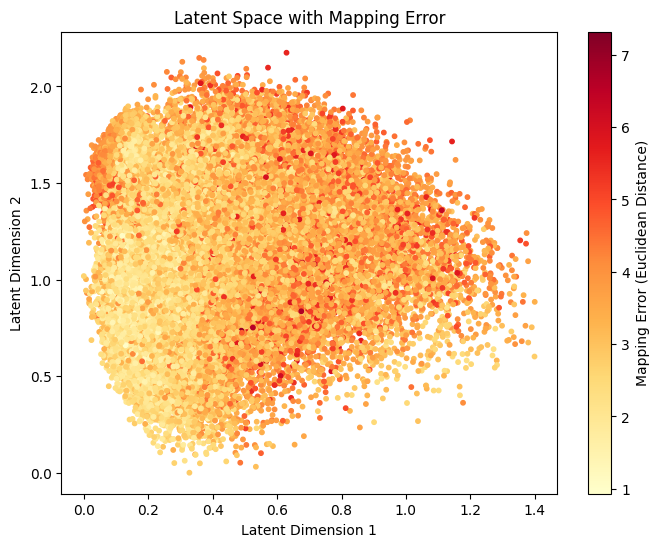

Defining the problem
Solving the problem
Results saved at  results/transformations/SMALLAE/Affine_MNIST_SMLLAE_0.01_128_5_3_MNIST_SMLLAE_0.01_128_1_4_49/Affine_MNIST_SMLLAE_0.01_128_5_3_MNIST_SMLLAE_0.01_128_1_4_49/mapping.pth


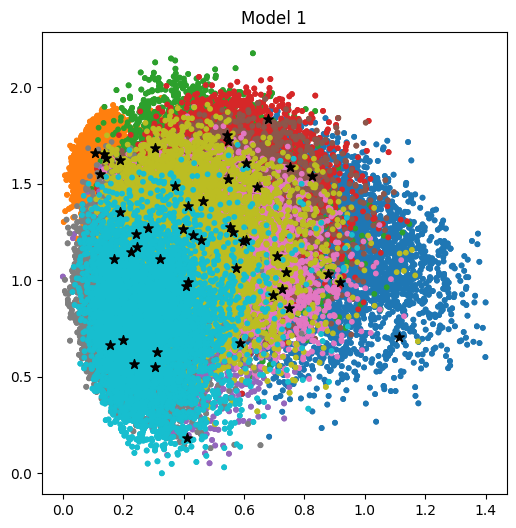

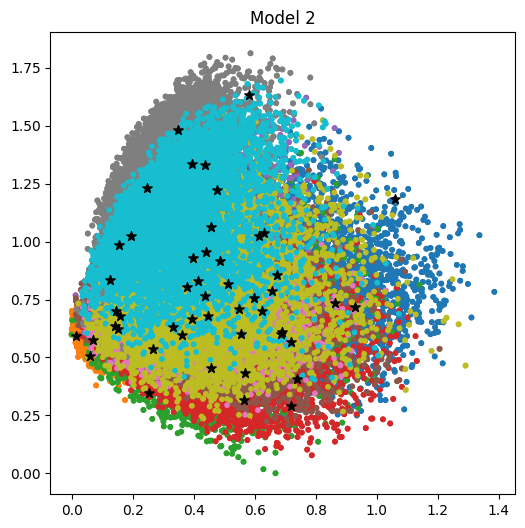

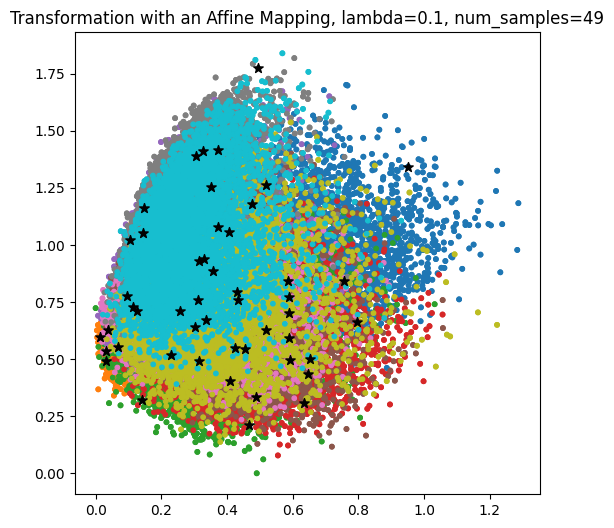

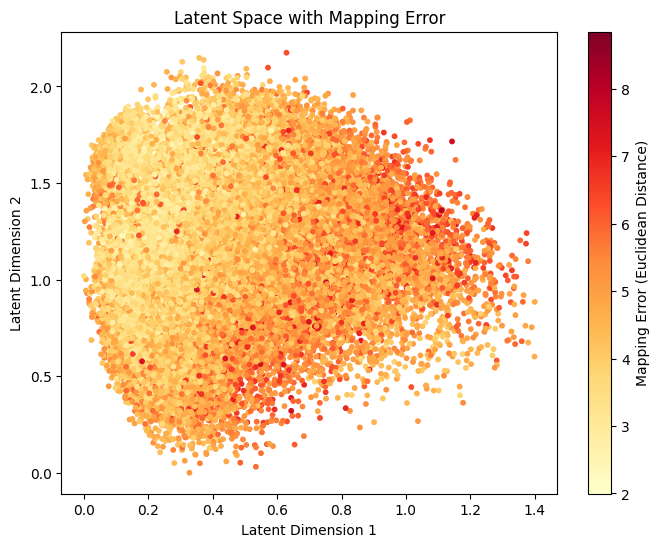

Defining the problem
Solving the problem
Results saved at  results/transformations/SMALLAE/Linear_MNIST_SMLLAE_0.01_128_5_3_MNIST_SMLLAE_0.01_128_1_4_98/Linear_MNIST_SMLLAE_0.01_128_5_3_MNIST_SMLLAE_0.01_128_1_4_98/mapping.pth


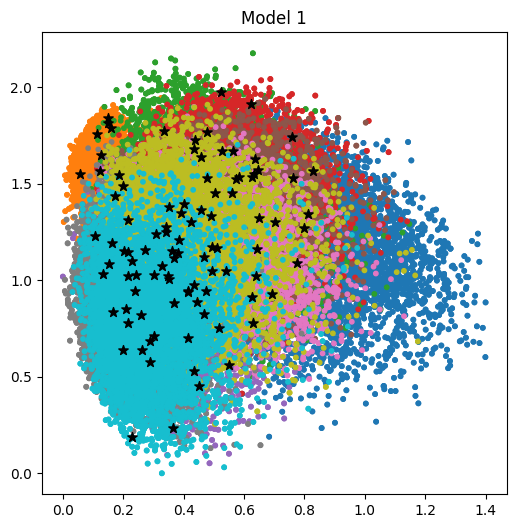

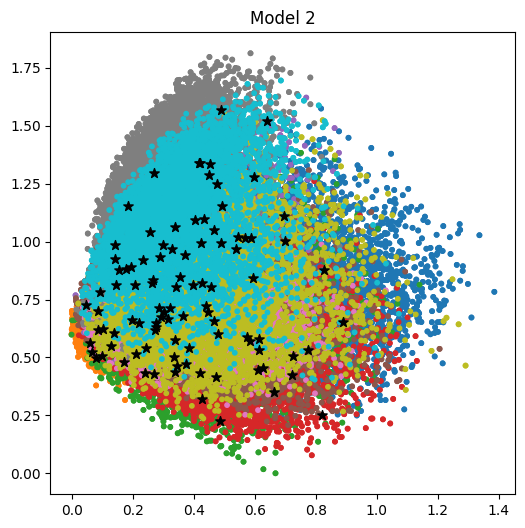

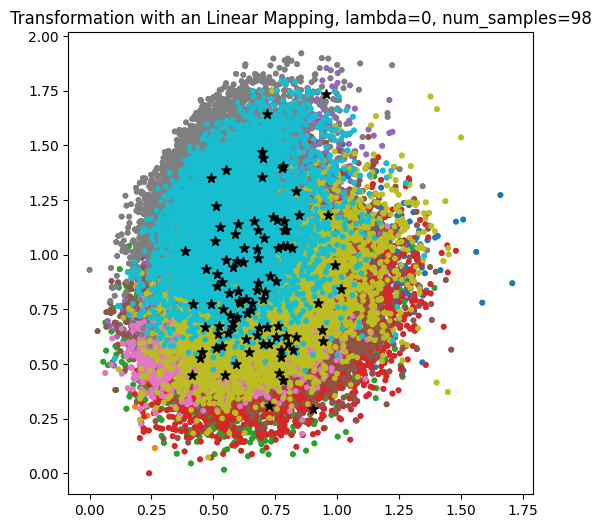

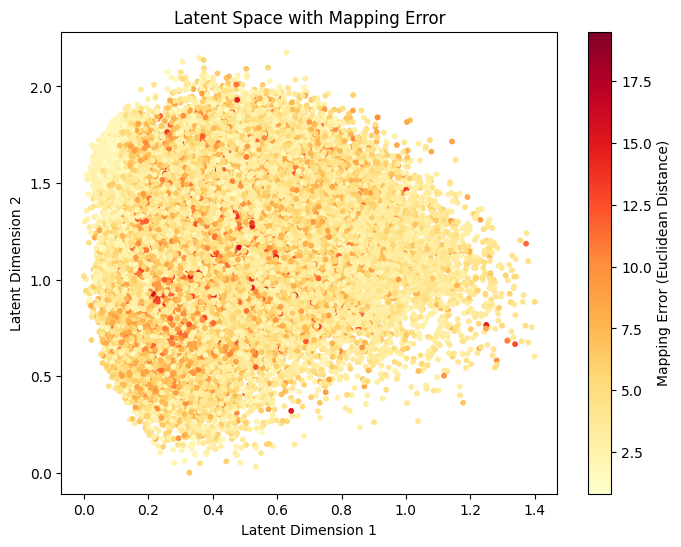

Defining the problem
Solving the problem
Results saved at  results/transformations/SMALLAE/Linear_MNIST_SMLLAE_0.01_128_5_3_MNIST_SMLLAE_0.01_128_1_4_98/Linear_MNIST_SMLLAE_0.01_128_5_3_MNIST_SMLLAE_0.01_128_1_4_98/mapping.pth


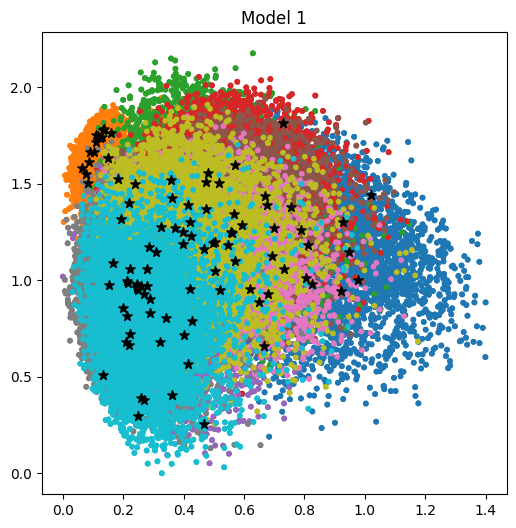

KeyboardInterrupt: 

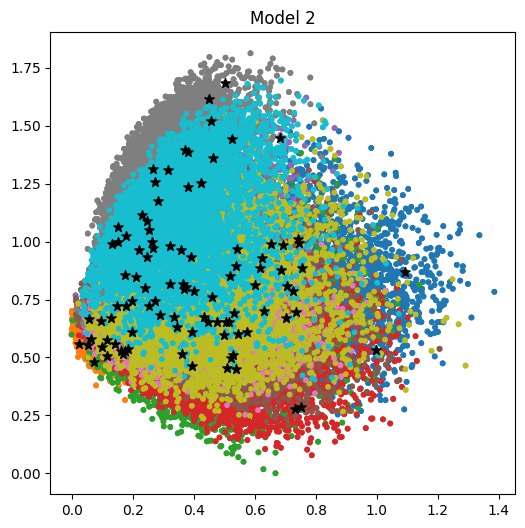

In [3]:
model = PocketAutoencoder()

num_samples = [49, 98, 196]
mapping = ['Linear', 'Affine']
lamda = [0, 0.01, 0.1]
combinations = [num_samples, mapping, lamda]
combinations = list(itertools.product(*combinations))

for file1 in os.listdir('models/checkpoints/SMALLAE/MNIST/LATENTS/'):
    if file1.endswith('.pth') and "_0.01_128_" in file1:
        latents1 = torch.load('models/checkpoints/SMALLAE/MNIST/LATENTS/' + file1)
        for file2 in os.listdir('models/checkpoints/SMALLAE/MNIST/LATENTS/'):
            if file1 != file2 and (file2.endswith('.pth') and "_0.01_128_" in file2):
                latents2 = torch.load('models/checkpoints/SMALLAE/MNIST/LATENTS/' + file2)

                for num_samples, mapping, lamda in combinations:
                    parameters = {
                        "num_samples": num_samples,
                        "mapping": mapping,
                        "lamda": lamda,
                    }

                    latent1_pl = []
                    latent2_pl = []
                    labels = []
                    for key in latents1.keys():
                        latent1_pl.append(latents1[key][0])
                        latent2_pl.append(latents2[key][0])
                        labels.append(latents1[key][1])

                    latent1_pl = torch.tensor(latent1_pl)
                    latent2_pl = torch.tensor(latent2_pl)
                    # Generate random indices once
                    num_total_points = latent1_pl.size(0)
                    random_indices = torch.randperm(num_total_points)[:parameters["num_samples"]]

                    # Sample the same points from both tensors
                    lats1_sampled = latent1_pl[random_indices]
                    lats2_sampled = latent2_pl[random_indices]
                    cfg = Config(**parameters)
                    mapping = create_mapping(cfg, lats1_sampled, lats2_sampled)

                    os.chdir('/Users/federicoferoggio/Documents/vs_code/latent-communication')
                    mapping.fit()
                    storage_path = f'results/transformations/SMALLAE/{cfg.mapping}_{file1[:-len("_latent_space.pth")]}_{file2[:-len("_latent_space.pth")]}_{cfg.num_samples}/{cfg.mapping}_{file1[:-len("_latent_space.pth")]}_{file2[:-len("_latent_space.pth")]}_{cfg.num_samples}/'
                    Path(storage_path).parent.mkdir(parents=True, exist_ok=True)
                    storage_path_name = storage_path + 'mapping.pth'
                    mapping.save_results(storage_path_name)
                    latents1_trafo = mapping.transform(latent1_pl)
                    _, latents1_2d = visualize_latent_space_pca(latent1_pl, labels, storage_path + "latent_1.png", anchors=lats1_sampled, title="Model 1")
                    pca, latents2_2d = visualize_latent_space_pca(latent2_pl, labels, storage_path + "latent_2.png", anchors=lats2_sampled, title="Model 2")
                    _, latents1_trafo_2d = visualize_latent_space_pca(latents1_trafo, labels, storage_path + "latents1_transformed.png", anchors=mapping.transform(lats1_sampled), pca=pca, title="Transformation with an " + cfg.mapping + " Mapping, lambda=" + str(cfg.lamda) + ", num_samples=" + str(cfg.num_samples))

#                    visualize_modified_latent_space_pca(latents1_trafo,latent2_pl, labels, storage_path + "latent_transformed.png", anchors=mapping.transform(lats1_sampled), title="Transformation with an " + cfg.mapping + " Mapping, lambda=" + str(cfg.lamda) + ", num_samples=" + str(cfg.num_samples))                   
                    errors = np.linalg.norm(latents1_trafo - latent2_pl, axis=1)
                    visualize_mapping_error(latents1_2d, errors, storage_path + f"mapping_error_{cfg.mapping}_.png")
